# Project 1.3 : Last Letters

In [159]:
# import packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Task 1
Read all files from the Baby Name Dataset into a single DataFrame. The DataFrame should have the columns name, gender, number and year.

In [160]:
import os
import glob
path = os.getcwd()
csv_files = glob.glob(os.path.join('names', "*.txt"))
files = []
for f in csv_files:
    # read the csv file
    df = pd.read_csv(f , names=['name', 'gender', 'number'])
    df['year'] = int(f[9:13])
    files.append(df)

dataframes = pd.concat(files)

# Display concated dataframes
dataframes

,name,gender,number,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
31532,Zyeire,M,5,2021
31533,Zyel,M,5,2021
31534,Zyian,M,5,2021
31535,Zylar,M,5,2021


## Task 2
- Create an extra column with the last letter of each name.
- Create string indexes for an entire column
- Alternatively, write a function that returns the last letter and use it to create a pd.Series

In [141]:
# Create column with last letter of each name
dataframes['last_letter'] = dataframes['name'].str[-1:]

# Display dataframe
dataframes

,name,gender,number,year,last_letter
0,Mary,F,7065,1880,y
1,Anna,F,2604,1880,a
2,Emma,F,2003,1880,a
3,Elizabeth,F,1939,1880,h
4,Minnie,F,1746,1880,e
...,...,...,...,...,...
31532,Zyeire,M,5,2021,e
31533,Zyel,M,5,2021,l
31534,Zyian,M,5,2021,n
31535,Zylar,M,5,2021,r


In [142]:
# Tried to do it by writing a function but Jupyter just loads the cell without executing anything
"""
# Function that returns the last letter of each name
def my_func(name):
    return dataframes['name'].str[-1:]
# Using function to create pd.Series
dataframes['last_letter'] = dataframes['name'].apply(my_func)

dataframes

"""

"\n# Function that returns the last letter of each name\ndef my_func(name):\n    return dataframes['name'].str[-1:]\n# Using function to create pd.Series\ndataframes['last_letter'] = dataframes['name'].apply(my_func)\n\ndataframes\n\n"

## Task 3
Create a bar plot showing the count of each last letter.

last_letter
a    63380722
b     1560660
c     1799702
d    17391365
e    54249070
f      227057
g      664992
h    16165036
i     5404309
j       45362
k     5629448
l    21674899
m     6607764
n    62068055
o     5239906
p      702510
q       16309
r    15379404
s    21826860
t    12416166
u      206395
v       74936
w     3251588
x      801561
y    44819340
z      284817
Name: number, dtype: int64


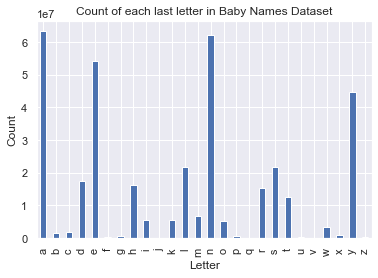

In [143]:
# Group by each letter, then find the sum of each letter
letter_count = dataframes.groupby('last_letter')['number'].sum()
print(letter_count)

# Bar plot of the result
p1 = letter_count.plot(kind='bar', title = 'Count of each last letter in Baby Names Dataset', xlabel = 'Letter', ylabel = 'Count')
plt.show()

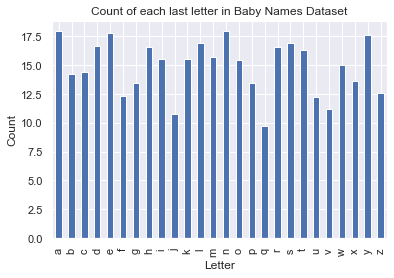

In [144]:
# Bar plot of the last letters count but log-transformed
letter_count2 = np.log(letter_count)
p2 = letter_count2.plot(kind='bar', title = 'Count of each last letter in Baby Names Dataset', xlabel = 'Letter', ylabel = 'Count')
plt.show()

## Task 4
Now, create a timeline for one last letter.
- First, select that letter over all years. 
- Second, group by the year and calculate the count for each year.
- Finally, create a line plot from this data.

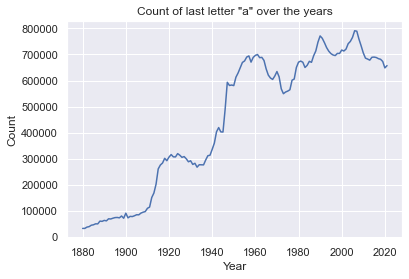

In [145]:
# Display rows with the last letter 'a'
letter_a = dataframes[dataframes['last_letter'] == 'a']
letter_a

# Group by year and calculating count for each year
letter_count = letter_a.groupby('year')['number'].sum()
letter_count

# Line plot of count of last letter a each year
p3 = letter_count.plot(title = 'Count of last letter "a" over the years', xlabel = 'Year', ylabel = 'Count')
plt.show()

## Task 5
Let's plot multiple timelines.

Count the names grouped by last letter and year.

In [ ]:
# Count names grouped by last letter and year
letter_year = dataframes.groupby(['last_letter', 'year'])['number'].count()
letter_year

This DataFrame has a hierarchical index.

Convert the DataFrame to a crosstable that has the year in the row index and the letters in the column index.

Draw a line plot showing the frequency of the letters d, n and y. Try other ones if you like.

In [147]:
# Convert the Dataframe to a crosstable with year as row index and letters as column index
crosstable = letter_year.unstack(0)
crosstable

last_letter,a,b,c,d,e,f,g,h,i,j,...,q,r,s,t,u,v,w,x,y,z
year,,,,,,,,,,,,,,,,,,,,,
1880,450.0,7.0,7.0,93.0,490.0,7.0,9.0,60.0,7.0,NaN,...,NaN,89.0,125.0,76.0,5.0,1.0,7.0,4.0,148.0,4.0
1881,432.0,6.0,8.0,85.0,484.0,5.0,13.0,59.0,6.0,NaN,...,NaN,83.0,116.0,78.0,4.0,1.0,7.0,5.0,142.0,2.0
1882,478.0,7.0,8.0,96.0,538.0,8.0,10.0,70.0,6.0,NaN,...,NaN,87.0,124.0,83.0,3.0,1.0,8.0,5.0,167.0,4.0
1883,480.0,5.0,8.0,96.0,542.0,7.0,10.0,61.0,4.0,NaN,...,NaN,86.0,122.0,79.0,4.0,1.0,9.0,6.0,151.0,2.0
1884,543.0,10.0,7.0,101.0,584.0,6.0,10.0,72.0,4.0,NaN,...,NaN,100.0,133.0,83.0,4.0,1.0,7.0,4.0,179.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017,6819.0,121.0,113.0,544.0,4091.0,78.0,124.0,2478.0,2424.0,75.0,...,26.0,1384.0,1172.0,504.0,152.0,90.0,52.0,157.0,2049.0,160.0
2018,6674.0,114.0,98.0,517.0,4009.0,80.0,111.0,2421.0,2503.0,71.0,...,28.0,1381.0,1179.0,488.0,155.0,88.0,51.0,165.0,2015.0,161.0
2019,6532.0,114.0,110.0,526.0,3965.0,73.0,99.0,2407.0,2658.0,71.0,...,22.0,1424.0,1195.0,471.0,157.0,87.0,52.0,170.0,2031.0,155.0


Text(0.5, 1.0, 'Frequency of letters "d","n", and "y" over the years')

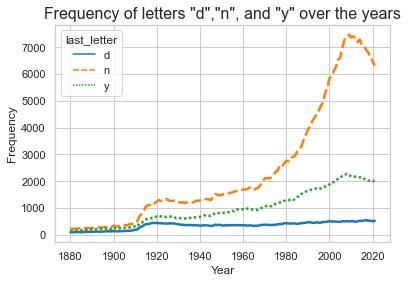

In [149]:
# Select columns with letters 'd' , 'n' and 'y'
crosstable_dny = crosstable[['d', 'n', 'y']]
crosstable_dny


# Line plot showing the frequency of the letters d, n and y
sns.set_theme(style="whitegrid")

rs = np.random.RandomState(365)
values = rs.randn(365, 4).cumsum(axis=0)
dates = pd.date_range("1 1 2016", periods=365, freq="D")
data = crosstable_dny

p4 = sns.lineplot(data=data, palette="tab10", linewidth=2.5)
p4.set_xlabel('Year')
p4.set_ylabel('Frequency')
p4.set_title('Frequency of letters "d","n", and "y" over the years', fontsize=16)

## Task 6

Finally, let's look for frequent first/last letter combinations.
- Add an extra column containing the first letter.
- Cross-tabulate by grouping by first and last letter and count the names (over all years).

Now you should have a table with first letters in columns an last letters in rows (or vice versa).
- Plot a heatmap

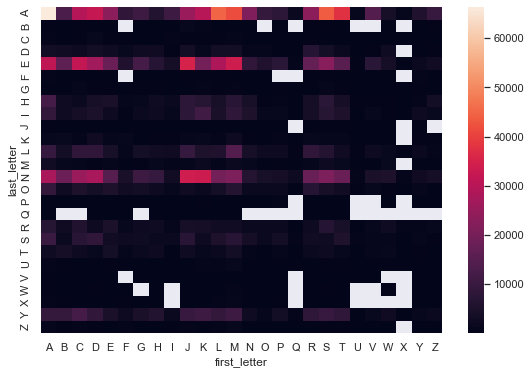

In [150]:
# To make the plot nicer convert the names to upper or lower case
dataframes['name'] = dataframes['name'].str.upper()
dataframes['last_letter'] = dataframes['last_letter'].str.upper()

# Add an extra column containing the first letter
dataframes['first_letter'] = dataframes['name'].str[0]

dataframes

# Crosstable grouped by first & last letter and count names over all years
first_last = dataframes.groupby(['first_letter', 'last_letter'])['number'].count()
first_last = first_last.unstack(0)
first_last

# Plot a heatmap

sns.set_theme()
# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(9, 6))
p5 = sns.heatmap(first_last, ax=ax)


## Task 7
Save your plots to .png files with 150 dpi.

In [158]:
# Saving each plot as .png file with 150 dpi
p1.figure.savefig('p1.png', dpi=150)
p2.figure.savefig('p2.png', dpi=150)
p3.figure.savefig('p3.png', dpi=150)
p4.figure.savefig('p4.png', dpi=150)
p5.figure.savefig('p5.png', dpi=150)

## Task 8
What visualization(s) would you use to compare the last letters of girls and boys?

- Clustered bar plot
- Line plot